# Online Ticket Sales Database
👋 Welcome to your workspace! Here, you can run SQL queries, write Python code, and add text in [Markdown](https://www.markdownguide.org/basic-syntax/). This workspace is automatically connected to an Amazon Redshift database containing tables about online ticket sales ([source](https://docs.aws.amazon.com/redshift/latest/dg/c_sampledb.html)). 

You can click the "Browse tables" button in the upper righthand corner of the cell below to view the available tables.

_There is a short query and a visualization of the number of tickets sold and the price per ticket over time rendered in [Plotly](https://plotly.com/python/) to get you started._

In [15]:
SELECT 
    caldate, 
    eventname,  
    catgroup, 
    priceperticket,
    SUM(qtysold) AS qtysold
FROM event
INNER JOIN category USING(catid)
INNER JOIN date USING(dateid)
INNER JOIN sales USING(eventid)
INNER JOIN listing USING(eventid)
GROUP BY caldate, eventname, catgroup, priceperticket
ORDER BY qtysold DESC
LIMIT 100

,caldate,eventname,catgroup,priceperticket,qtysold
0,2008-11-02 00:00:00+00:00,Built To Spill,Concerts,96.0,291
1,2008-11-19 00:00:00+00:00,Spring Awakening,Shows,137.0,261
2,2008-12-12 00:00:00+00:00,All My Sons,Shows,208.0,249
3,2008-10-29 00:00:00+00:00,Phantom of the Opera,Shows,93.0,244
4,2008-04-26 00:00:00+00:00,Shakira,Concerts,193.0,219
...,...,...,...,...,...
95,2008-03-25 00:00:00+00:00,Flogging Molly,Concerts,238.0,166
96,2008-11-09 00:00:00+00:00,Simple Plan,Concerts,385.0,166
97,2008-05-03 00:00:00+00:00,Mystere Cirque du Soleil,Shows,322.0,166
98,2008-08-31 00:00:00+00:00,Rock 'n' Roll,Shows,47.0,166


In [16]:
--Average price of tickets per event category
SELECT catname, AVG(priceperticket) AS avg_price
FROM event
INNER JOIN category USING (catid)
INNER JOIN listing USING (eventid)
GROUP BY catname;

,catname,avg_price
0,Musicals,397.81
1,Plays,398.53
2,Pop,396.12
3,Opera,402.69


In [17]:
--Top Selling Venues
SELECT venuename, SUM(numtickets) AS total_tickets_sold
FROM venue
INNER JOIN event USING (venueid)
INNER JOIN listing USING (eventid)
GROUP BY venuename
ORDER BY total_tickets_sold DESC
LIMIT 10;

,venuename,total_tickets_sold
0,Lyric Opera House,23903
1,Lunt-Fontanne Theatre,18728
2,Hilton Theatre,17592
3,August Wilson Theatre,17503
4,Helen Hayes Theatre,16415
5,Nederlander Theatre,16301
6,Imperial Theatre,16013
7,Ethel Barrymore Theatre,15907
8,Pasadena Playhouse,15865
9,Winter Garden Theatre,15776


In [18]:
--Average ticket price per venue name
SELECT venuename, AVG(priceperticket) AS average_ticket_price
FROM venue
INNER JOIN event USING (venueid)
INNER JOIN listing USING (eventid)
GROUP BY venuename
ORDER BY average_ticket_price DESC
LIMIT 10;

,venuename,average_ticket_price
0,Soldier Field,459.53
1,Gillette Stadium,437.86
2,Xcel Energy Center,437.07
3,Great American Ball Park,428.55
4,Robertson Stadium,427.09
5,Ralph Wilson Stadium,426.80
6,Majestic Theatre,426.65
7,Paris MGM Grand,426.20
8,Minskoff Theatre,426.07
9,Shoreline Amphitheatre,425.91


In [19]:
# Import libraries
import pandas as pd
import plotly.express as px

# Create scatter plot
fig = px.scatter(
    ticket_prices,
    x="caldate",
    y="qtysold",
    color="catgroup",
    size="priceperticket",
    hover_data=["eventname"],
)

# Create labels and show plot
fig.update_layout(
    title="Biggest Concerts and Shows over Time<br><sup>By Quantity Sold and Price of Tickets</sup>",
    title_x=0.5,
    xaxis_title="Date",
    yaxis_title="Quantity Sold",
    legend_title="Category",
    template="plotly_dark",
)
fig.show()

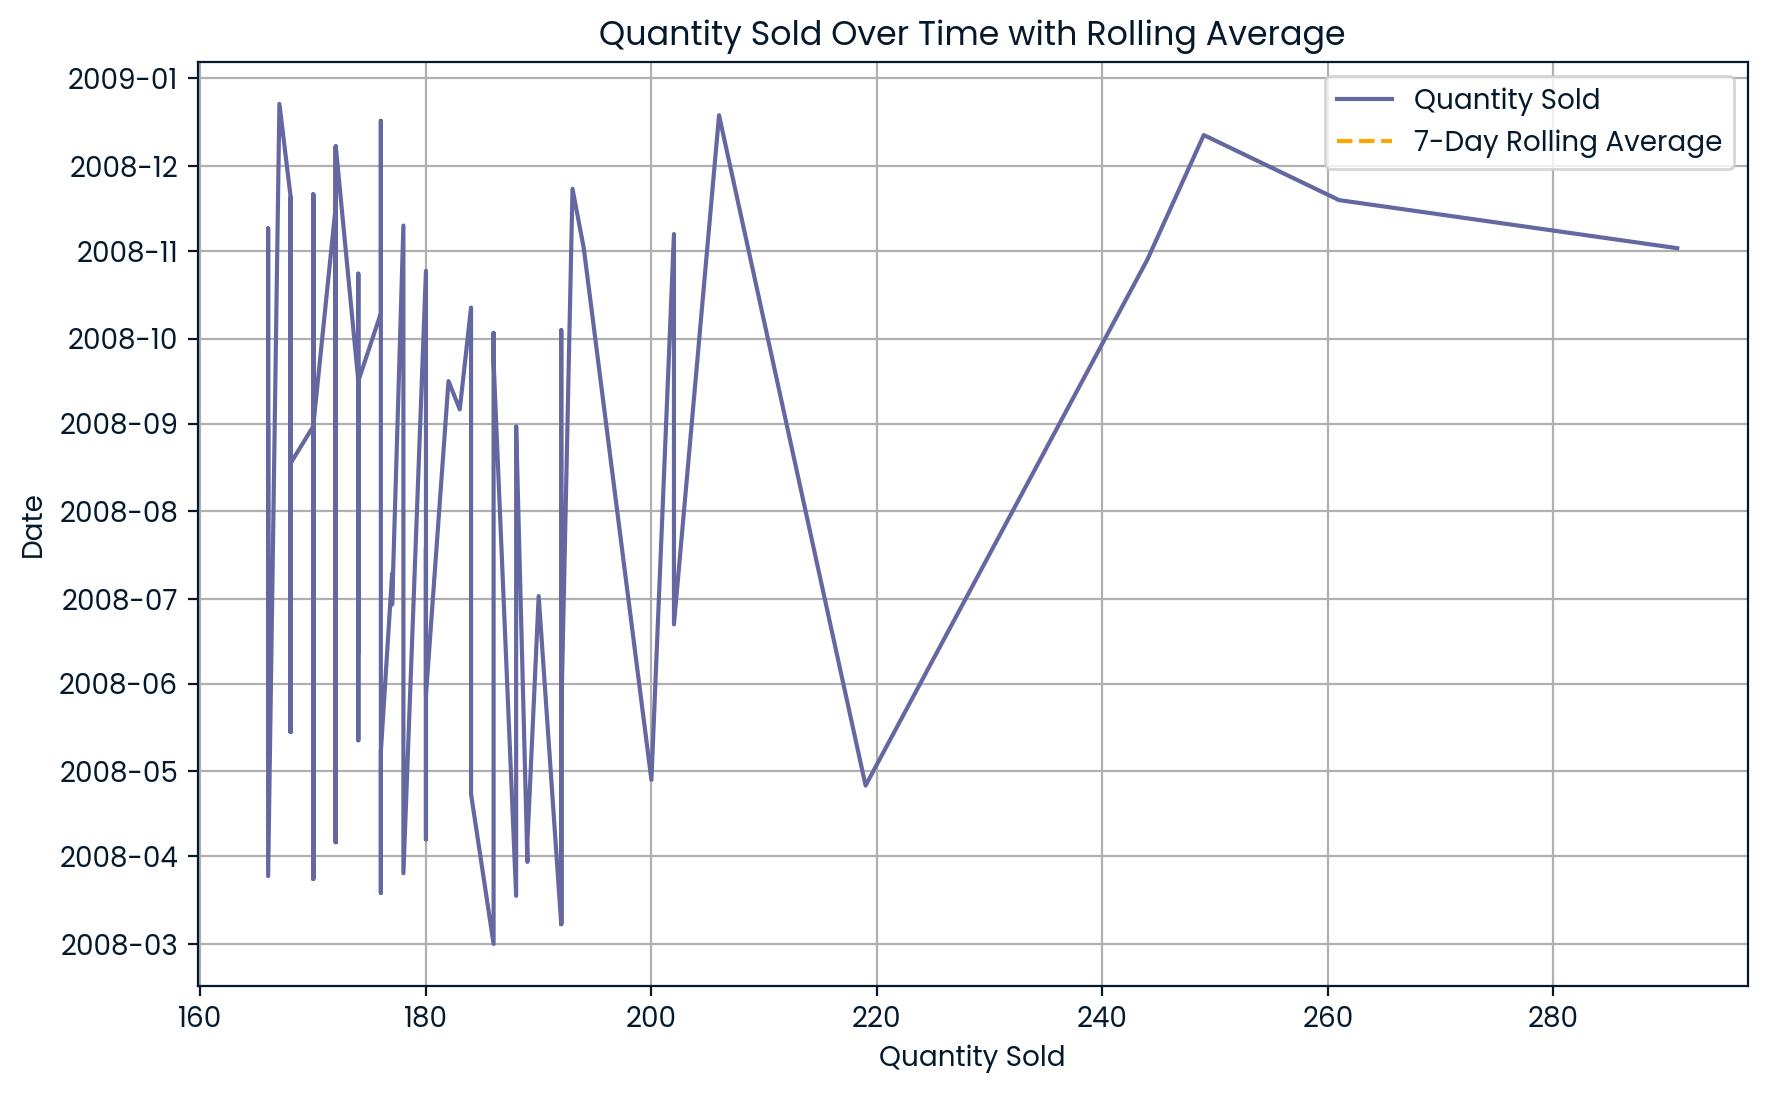

In [20]:
import matplotlib.pyplot as plt

ticket_prices['rolling_average'] = ticket_prices.groupby('caldate')['qtysold'].transform(lambda x: x.rolling(window=7).mean())

plt.figure(figsize=(10, 6))
plt.plot(ticket_prices['qtysold'], ticket_prices['caldate'], label='Quantity Sold')
plt.plot(ticket_prices['rolling_average'], ticket_prices['caldate'], label='7-Day Rolling Average', linestyle='--', color='orange')
plt.title('Quantity Sold Over Time with Rolling Average')
plt.xlabel('Quantity Sold')  # Quantity Sold on x-axis
plt.ylabel('Date')  # Date on y-axis
plt.legend()
plt.grid(True)
plt.show()

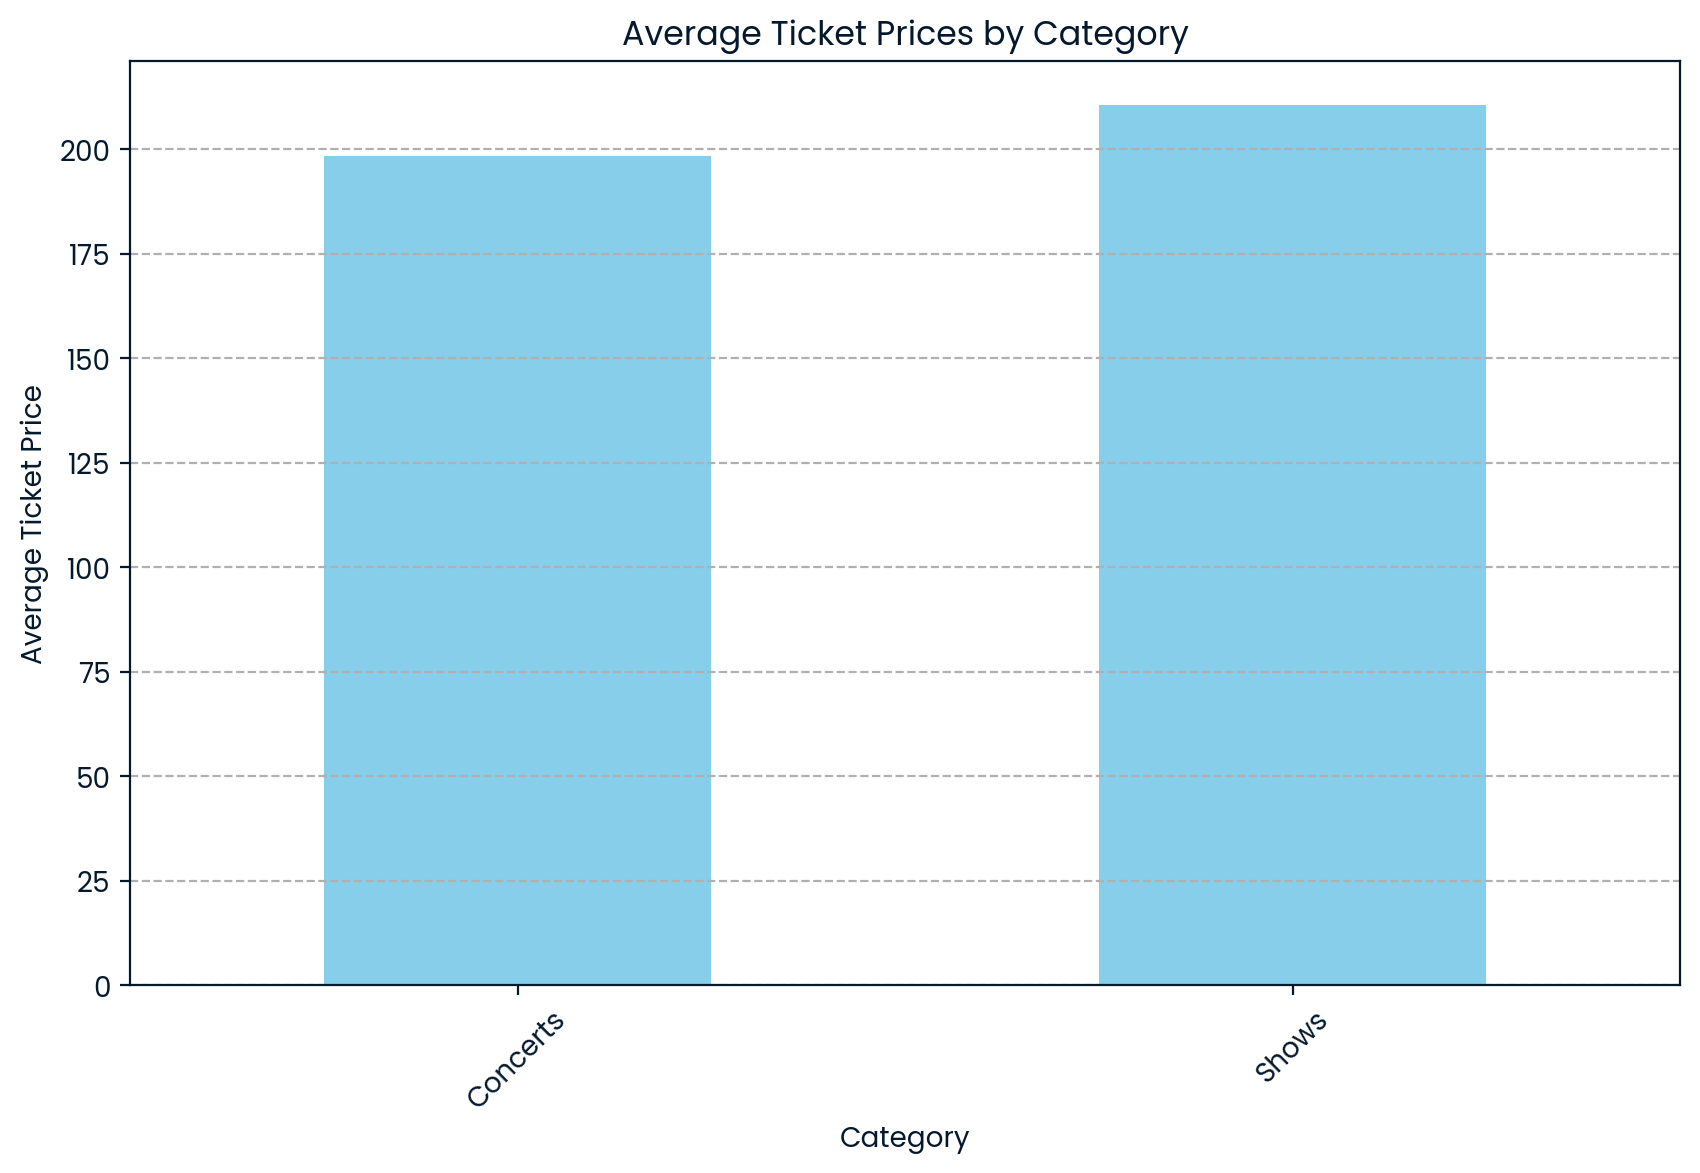

In [21]:
plt.figure(figsize=(10, 6))
ticket_prices.groupby('catgroup')['priceperticket'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Ticket Prices by Category')
plt.xlabel('Category')
plt.ylabel('Average Ticket Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

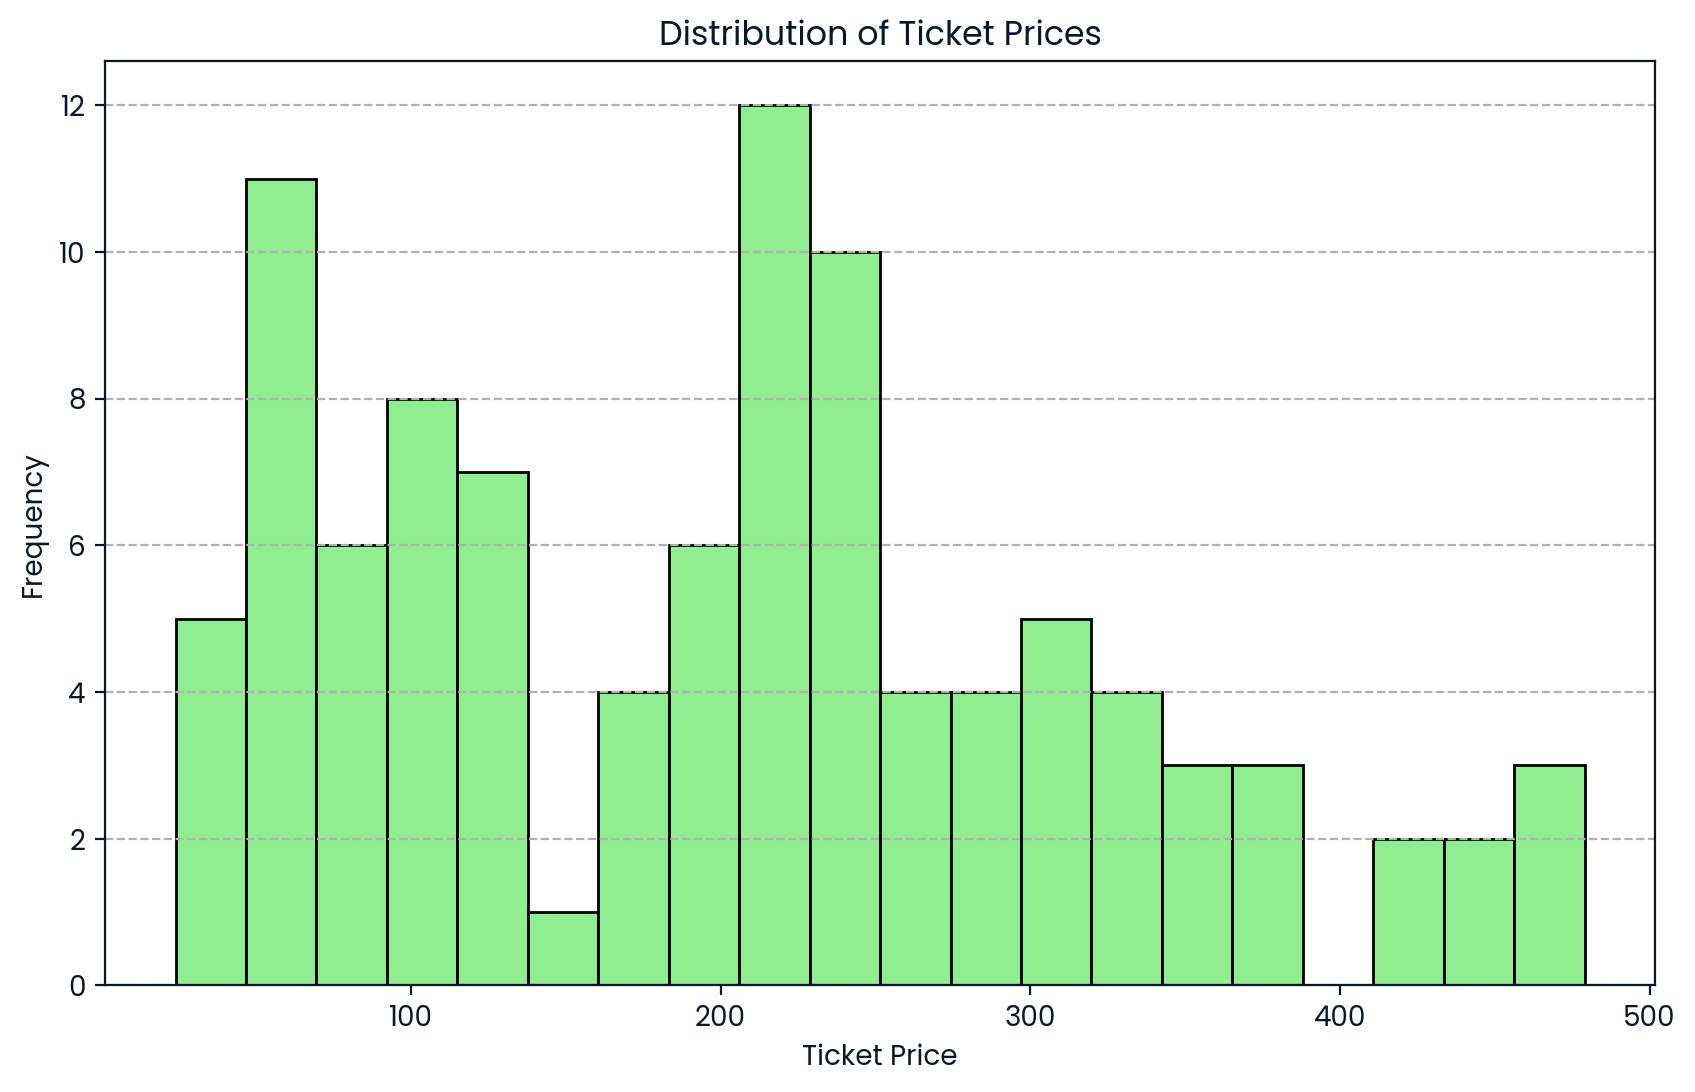

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(ticket_prices['priceperticket'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

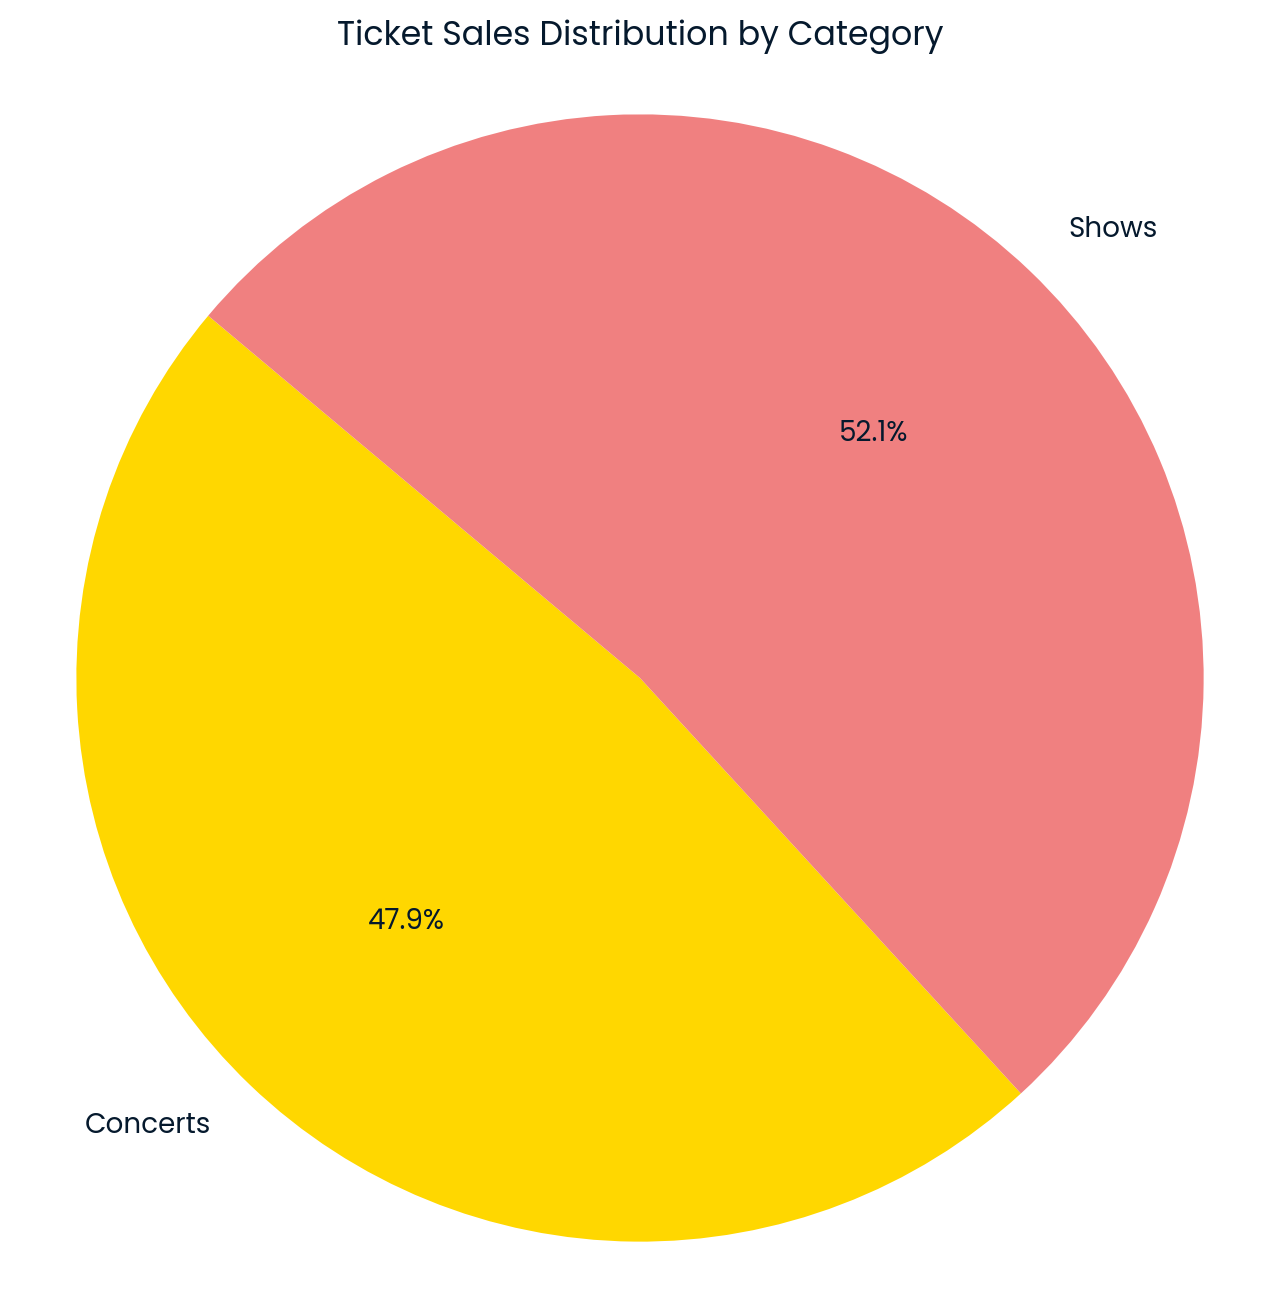

In [23]:
plt.figure(figsize=(8, 8))
ticket_sales = ticket_prices.groupby('catgroup')['qtysold'].sum()
plt.pie(ticket_sales, labels=ticket_sales.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'], startangle=140)
plt.title('Ticket Sales Distribution by Category')
plt.axis('equal')
plt.show()

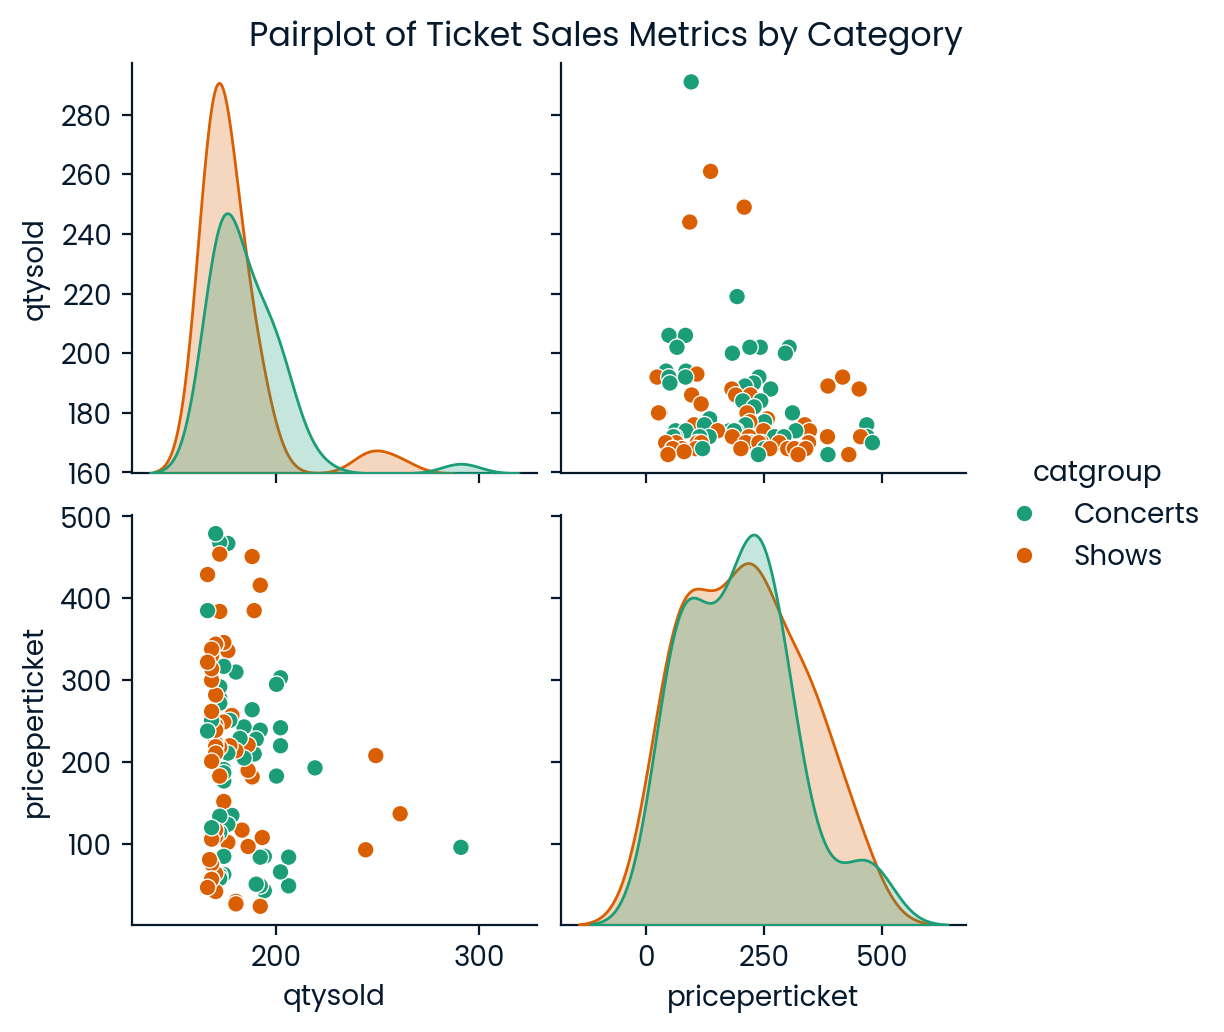

In [24]:
import seaborn as sns

sns.pairplot(ticket_prices[['qtysold', 'priceperticket', 'catgroup']], hue='catgroup', palette='Dark2')
plt.suptitle('Pairplot of Ticket Sales Metrics by Category', y=1.02)
plt.show()

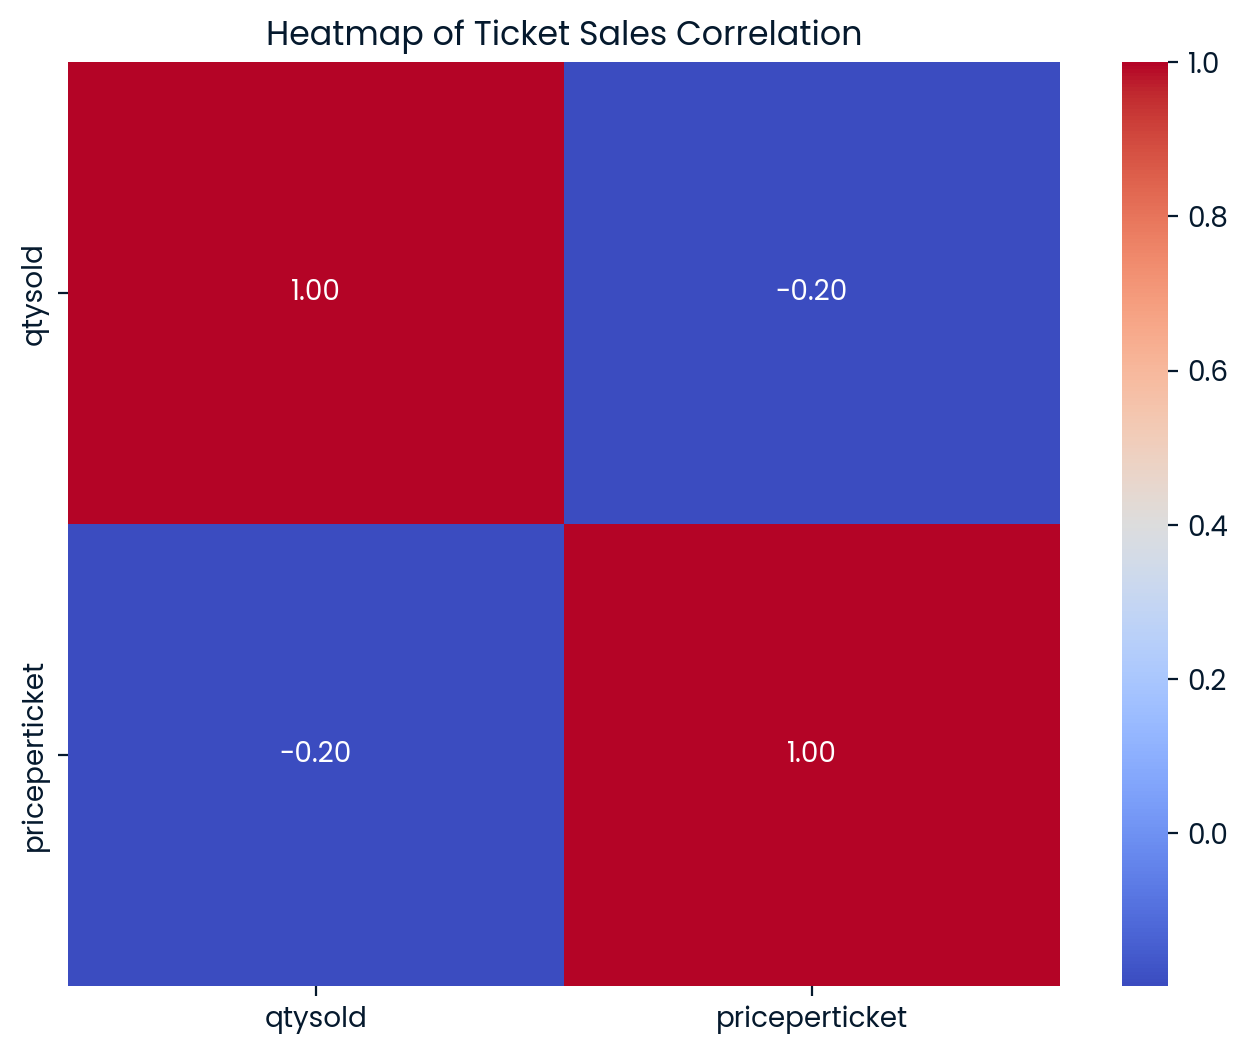

In [25]:
# Compute correlation matrix
corr_matrix = ticket_prices[['qtysold', 'priceperticket']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Ticket Sales Correlation')
plt.show()

_This is an interactive plot! Hover over different points to learn the details of each event._

---

💪 Now it's your turn to construct your own queries and analyze the data! Remember, you can review the tables in the database at any point using the "Browse tables" button.